### 목표
    - 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
    - 머신러닝 전체 과정을 진행해보자

#### 1. 문제 정의
    - 생존과 사망을 예측
    - kaggle 경진대회 높은 순위를 차지해보자

#### 2. 데이터 수집(불러와서 확인)

In [219]:
# 환경
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- q1. 타이타닉 train데이터와 test데이터를 변수 train, test에 저장하기(단, PassengerID 컬럼을 불러와서 인데스로 설정해서 불러오기)

In [220]:
test = pd.read_csv('./data/titanic/test.csv', index_col="PassengerId")
train = pd.read_csv('./data/titanic/train.csv', index_col="PassengerId")

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [221]:
# 크래확인

print('훈련 데이터 크기',train.shape)
print('테스트 데이터 크기',test.shape)



훈련 데이터 크기 (891, 11)
테스트 데이터 크기 (418, 10)


### 3. 데이터 전처리 및 데이터 확보

In [222]:
# train - info()
train.info()
# 결측치 있는 컬럼 : Age, Cabin, embarked
# 데이터 타입 : 숫자(정수,실수), 문자열
# - 모델은 문제 데이터를 숫자인것만 이해할 수 있음 
# 문자 -> 숫자 : encoding(라벨인코딩, 원핫인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [223]:
# test - info()
test.info()
# Survived 없음- 생존/사망
# y_test kagle이 알고 있음
# 경진대회 데이터는 테스트 문제까지만 제공
# 결측치 컬럼 o : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수)


<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [224]:
# 컬럼 정보 정리
train.columns

#'Survived' : 생존/사망 결과 값이 담긴 컬럼(0:사망, 1:생존)
# 'Pclass' : 승객 등급(1:상위층, 2:중상위층, 3:하위층)
# 'Name'    
# 'Sex'
# 'Age'
# 'SibSp'   : 형제자매/배우자 수(같이 탑승한)
# 'Parch'   : 부모/자식 수(같이 탑승한)
# 'Ticket'  : 티켓번호
# 'Fare'    : 요금
# 'Cabin'   : 객실번호
# 'Embarked': 승선항(S,C,Q)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Available features *
PassengerId - Passenger ID - Number  
Survived - Survived - Bool  
Pclass - Ticket class - available 1 = 1st, 2 = 2nd, 3 = 3rd - Number  
Name - First name, Last Name and optional Title - String  
Sex - Sex of passenger - available: male and female - String  
Age - Age in years - Number  
SibSp - of siblings / spouses aboard the Titanic - Number  
Parch - of parents / children aboard the Titanic - Number  
Ticket - Ticket Id - String  
Fare - Passenger fare / Ticker price - Number  
Cabin - Cabin number - String  
Embarked - Port of Embarkation - available C = Cherbourg, Q = Queenstown, S = Southampton - String  

- Train : Embarked 컬럼 결측치 채우기

In [225]:
# 데이터 확인 -> train 기준으로 확인
# 왜? 좋은 모델 만들기 위해서, 일반화된 모델을 만들기 위해서
# 학습시키는 데이터 -> train
train['Embarked'].value_counts()   # s 제일 많이 탐

# train['Embarked'] 결측치가 몇개 있는지? 2개
train['Embarked'].isnull().sum()
# train['Embarked'] r결측치가 있는 데이터 출력해보기
train[train['Embarked'].isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [226]:
# 두사람의 데이터가 서로 비슷
# 같은 승선항에서 탔을 것이다 가정
# 사람이 가장 많이 탑승한 장소의 승선항값으로 채워보기("S에서 가장 많이 탐")
# 1. 하나씩 인덱싱 접근 train.loc[62,'Embark'] = 'S'
# fillna(값) : 비어 있다면 값으로 대체하는 함수
train['Embarked'].fillna("S" ,inplace=True)

train['Embarked'].isnull().sum()

0

 - test:Fare 컬럼 결측치 채우기


In [227]:
# test 데이터 Fare 인덱싱 후 결측치 존재한느 행 출력
# isnull(), 불리언 인덱싱

print(test[test["Fare"].isnull()])

# pclass에 연관되지 않았을까? -> 연관있음
# 성별에 연관되지 않았을까? -> 
# 상관계수 확인(iris 참고)
train.corr(numeric_only= True)  # 문자열로 된 컬럼 제외:numeric_only
# Fare컬럼과 연관이 있는 컬럼은 뭘까?

# -1 ~ 1 표현되는 상관계수
# -1, +1 가까울수록 상관이 어느정도 높음
# 0 가까울수록 상대적으로 상관관계가 덜함(적음)

             Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
PassengerId                                                                
1044              3  Storey, Mr. Thomas  male  60.5      0      0   3701   

             Fare Cabin Embarked  
PassengerId                       
1044          NaN   NaN        S  


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [228]:
# train Fare 컬럼 기술통계량 확인하기
# describle()
# 중앙값, 평균값을 대표값을 선택할 건지 확인

train["Fare"].describe()    # 중앙값을 대표값으로 선택해보자

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [229]:
# Pclass, Sex -> Fare 중앙, 중앙, 평균 값으로 결측치를 대체해보자

# 1, female -> Fare 중앙값, 평균값을 확인하고 해당 값을 채워보자
# 1, male -> Fare 중앙값, 평균값
# 3, 남성 -> Fare 중앙값, 평균값을 확인해서 결측치 처리해야함
# test['Fare'] 3등급, 남성
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)의 중앙값
group = train.loc[:,["Pclass","Fare","Sex"]].groupby(['Pclass','Sex']).median()
group

# test['Fare'] 결측치 채우기 7.92500
test['Fare'].fillna(7.92500,inplace=True)
test['Fare'].isnull().sum() # 처리확인
test[test['Fare'].isnull()] # 처리확인


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


- Age 결측치 채우기
    - train, test 모두 처리
    - 나이의 평균, 중앙값으로 결측치를 채워보기
    - 다른 컬럼관 상관관계를 이용하여 결측치를 채워보기
    

In [230]:
# 기술통계량
# 중앙값 vs 평균값? 평균
train["Age"].describe()

test["Age"].describe()


count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [231]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기

train.corr(numeric_only= True)["Age"].abs().sort_values(ascending=False)
test.corr(numeric_only= True)["Age"].abs().sort_values(ascending=False)


Age       1.000000
Pclass    0.492143
Fare      0.331969
SibSp     0.091587
Parch     0.061249
Name: Age, dtype: float64

In [232]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기
# 1 - female, age, 평균
# 1 - male, age 평균

gb1 = train.loc[:,["Pclass","Sex","Age"]].groupby(["Pclass","Sex"]).mean()
gb1

# gb1 3등급, male 나이 평균값 접근해보기
# 중복인덱스(멀티인덱스) 접근 방법 : gb1.loc[(3,"male")]
gb1.loc[(3,"male")]

# 1등급 여성 나이 평균 출력해보기
gb1.loc[(1,"female")]

Age    34.611765
Name: (1, female), dtype: float64

In [233]:
# train, test
train[train["Age"].isnull()]    # 결측치 177개

# 결측치 채우기위해서 각 승객의 등급, 성별을 확인 후 Age 평균값을 인덱싱하여 채움
# 판다스.apply(나이결측치처리기능)

def prepro_age(row):
   # 만약 나이가 결측치라면 값을 가져오고
   if np.isnan(row["Age"]): # 결측치확인한느 함수 np.isnan(대상)
       return gb1.loc[(row["Pclass"],row["Sex"])]
   # 만약 나이가 아니라면 원래 나이값을 그래돌 사용하자 
   else:
       return row["Age"]
    
# train.apply(prepro_age,axis=0)  #axis=0이면 컬럼 하나가 row에 처리하는 단위로 들어감    
train['Age'] = train.apply(prepro_age,axis=1)  #axis=1이면 한 사람의 대한 데이터가 row
train['Age'].isnull().sum()

# 1 한 사람에 대한 데이터가 row
# 0 컬럼 하나가 row에 처리하는 단위로 들어감
# test['Age'] 컬럼도 결측치 처리, train(gb1) 그대로 사용


0

In [234]:
# test['Age']컬럼도 결측치 처리, train(gb1)그대로 사용
test['Age'] = test.apply(prepro_age,axis=1)
test['Age'].isnull().sum()

0

In [235]:
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')

C:\Users\smhrd\AppData\Local\Temp\ipykernel_17444\3844335434.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train['Age'].astype('int64')
C:\Users\smhrd\AppData\Local\Temp\ipykernel_17444\3844335434.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test['Age'].astype('int64')


- train, test : Cabin(객실번호) 채우기

In [236]:
#train['Cabin'] 결측치 몇개있는지?
train['Cabin'].isnull().sum()   # 절반 이상이 결측치 687개


687

In [237]:
# 중복없이 값 확인
# unique()
train['Cabin'].unique()
# 층 + 방번호 -> ex) C85
# 결측치에다가 임의로 "M" 값으로 채워보기
# fillna()
train['Deck']= train['Cabin'].fillna("M")
test['Deck']= test['Cabin'].fillna("M")



In [238]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기
train['Deck']=train['Deck'].str[0]
test['Deck']=test['Deck'].str[0]


In [239]:
# Cabin 컬럼 삭제
# train, test

train.drop('Cabin',axis=1, inplace=True)

test.drop('Cabin',axis=1, inplace=True)



In [240]:
# info()
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    i

### 데이터 탐색

<Axes: xlabel='Deck', ylabel='count'>

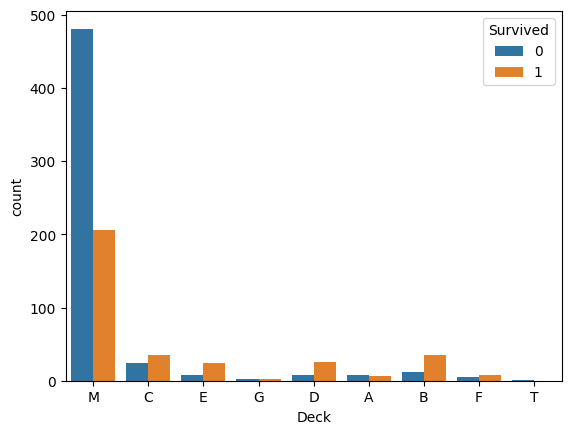

In [241]:
# "M" -> Deck
# Deck 과 Survived 컬럼 연관성 확인하기
# 막대그래프 활용
# train -> 학습에 영향을 주는 데이터 -> 데이터탐색 train 기준으로 함

sns.countplot(data=train,x='Deck',hue ='Survived')

In [242]:
# M에서 상대적으로 사람이 많이 사망함
# survived에 영향을 주지 않을까?

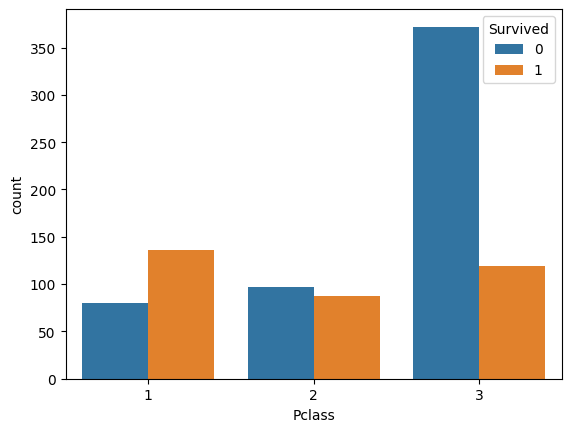

In [243]:
# Pclass와 Survived 시각화
# countplot
# 생존/사망 의미 파악해보기

sns.countplot(data=train,x="Pclass",hue="Survived")
plt.show()

In [244]:
# 1등급 - 비교적 생존율 높음
# 2등급 - 사망율이 조금 높음
# 3등급 - 사망율이 월등히 높음


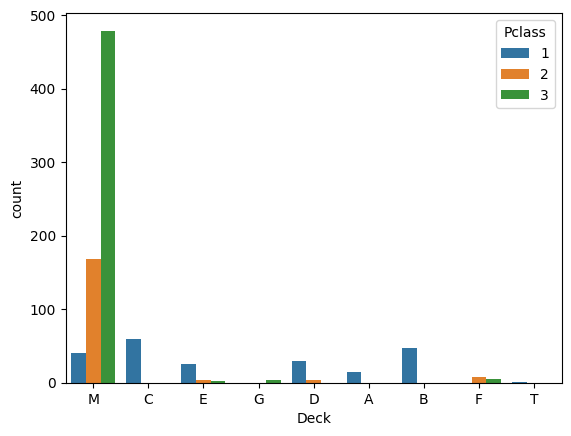

In [245]:
# Deck과 Pclass 연관지어서 시각화
# X - Deck
# hue - Pclass

sns.countplot(data=train,x='Deck',hue="Pclass")
plt.show()

In [246]:
# M에서 사망율이 높았던 건 3등급의 사람이 많아서 였음
# Deck 컬럼이 생존/사망 크게 영향을 주지는 것은 아님
# 오히려, Pclass 영향이 크게 미치고 있음

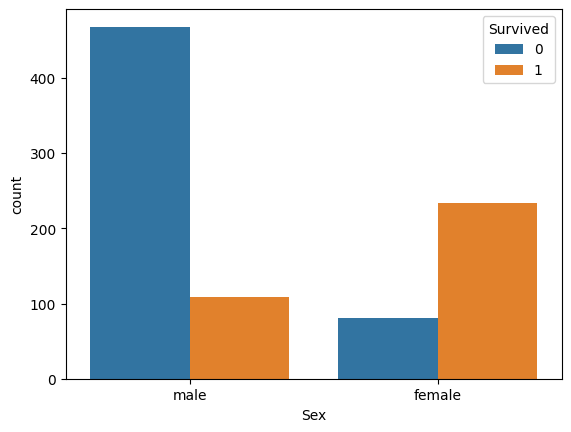

In [247]:
# Sex과 Survived 시각화
sns.countplot(data=train,x='Sex',hue="Survived")
plt.show()
# 남성 상대적으로 사망율 높음
# 여성 상대적으로 생존율 높음
# 생존/사망 판별에 하는데 Sex 도움이 되겠군

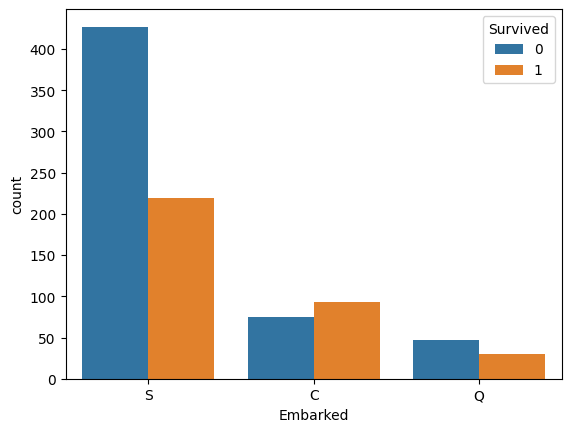

In [248]:
# Embarked와 Survived 시각화
sns.countplot(data=train,x='Embarked',hue="Survived")
plt.show()

# 승선항 생존/사망 크게 영향을 주지 않았겠군

<Axes: xlabel='Sex', ylabel='Age'>

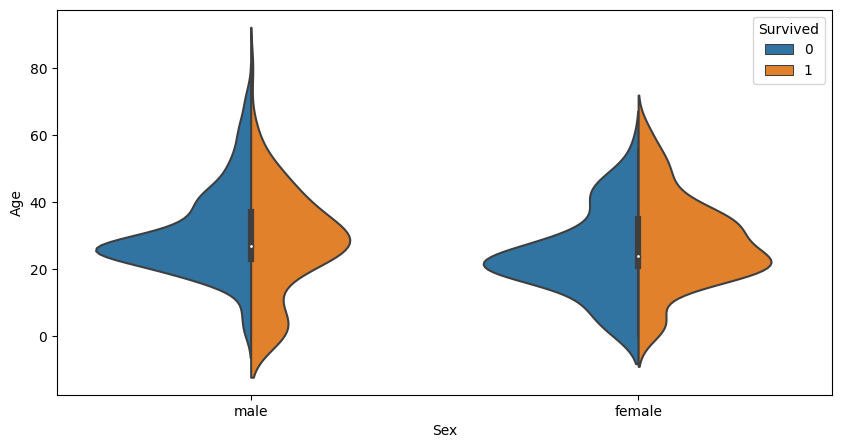

In [249]:
# Age와 Survived 연관성 확인하기
# violin plot - 바이올린 모양 그래프
# 데이터의 분포를 확인할 때 사용하는 방법

plt.figure(figsize=(10,5))
sns.violinplot(data = train,
               x = 'Sex',
               y = "Age",
               hue = 'Survived',
               split=True)

In [250]:
# 20~40대 남자 같은 경우에는 사망율이 높음
# 20~30대 여자 같은 경우에는 사망율이 높음
# 

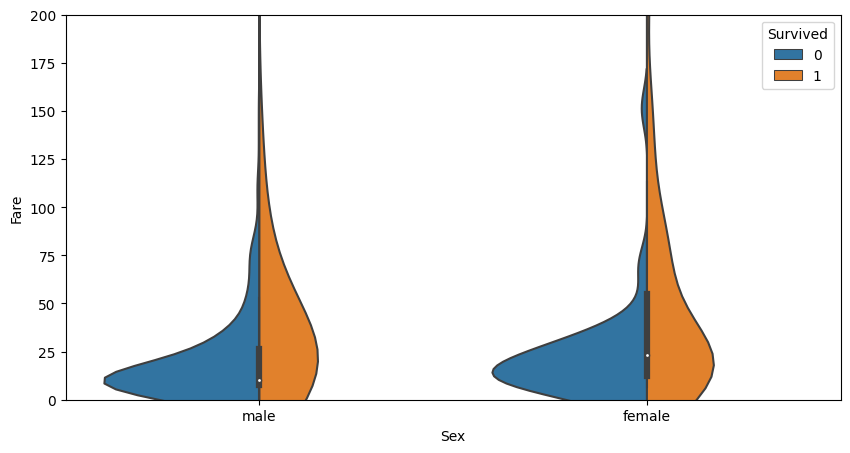

In [251]:
# Sex - x
# Fare - y
# hue - Surevived
plt.figure(figsize=(10,5))
sns.violinplot(data = train,
               x = 'Sex',
               y = "Fare",
               hue = 'Survived',
               split=True)
plt.ylim(bottom=0, top=200)
plt.show()

In [252]:
sns.__version__

'0.12.2'

In [253]:
# 요금이 저렴한살마은 상대적으로 많이 사망함


- Parch, Sibsp -  부모자식, 형제배우자
    - 특성공학 : 두개의 컬럼을 더해서 가족의 숫자라는 새로운 컬럼 생성
    - train에서 생성하면 test 동일하게 적용

In [254]:
# Parch + SibSp +1
train['Family_size']= train['Parch'] + train['SibSp'] + 1
test['Family_size']= test['Parch'] + test['SibSp'] + 1

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,M,1
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,M,4


In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Deck         891 non-null    object 
 11  Family_size  891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.5+ KB


<Axes: xlabel='Family_size', ylabel='count'>

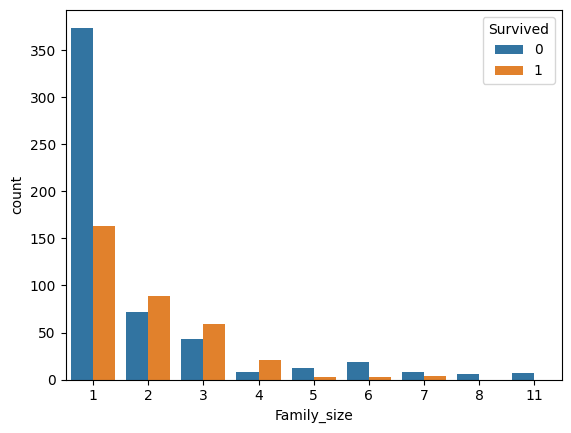

In [256]:
# 시각화
# countplot
sns.countplot(data=train, x='Family_size',hue="Survived")

In [257]:
# 1명 - 사망율 높음
# 2~4명 - 생존율 높음
# 5 이상 - 사망율 높음

# 범주를 줄일 것 - > binning(사소한 관찰오류를 줄일 수 있음)

In [258]:
# 가족사이즈가 1이면 Alone, 2~4명 Small, 5명 이상 Large
# train, test 적용
# pd.cut()
bins = [0,1,4,11]
labels = ['Alone','Small','Large']
train['Family_group'] = pd.cut(train['Family_size'],bins = bins, labels=labels)
test['Family_group'] = pd.cut(test['Family_size'],bins = bins, labels=labels)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size,Family_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,2,Small
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,M,1,Alone
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,1,Alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,M,4,Small


<Axes: xlabel='Family_group', ylabel='count'>

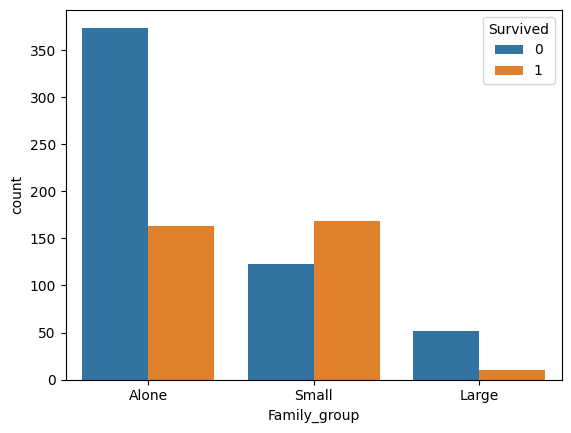

In [259]:
sns.countplot(data= train, x='Family_group',hue='Survived')

In [260]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck', 'Family_size', 'Family_group'],
      dtype='object')

- 불필요한 컬럼 삭제
    - Name, Ticket, Famil_size


In [261]:
train.drop(['Name','Ticket','Family_size'], axis=1, inplace=True)
test.drop(['Name','Ticket','Family_size'], axis=1, inplace=True)

train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 70.6+ KB


In [262]:
# 문제와 답 분리
X_train = train.iloc[:,1:]
y_train = train['Survived']
X_test = test

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_group
PassengerId,,,,,,,,,
1,3,male,22,1,0,7.2500,S,M,Small
2,1,female,38,1,0,71.2833,C,C,Small
3,3,female,26,0,0,7.9250,S,M,Alone
4,1,female,35,1,0,53.1000,S,C,Small
5,3,male,35,0,0,8.0500,S,M,Alone
...,...,...,...,...,...,...,...,...,...
887,2,male,27,0,0,13.0000,S,M,Alone
888,1,female,19,0,0,30.0000,S,B,Alone
889,3,female,21,1,2,23.4500,S,M,Small


In [263]:
# 크기확인
print('훈련 문제', X_train.shape)
print('훈련 답', y_train.shape)
print('테스트 문제', X_test.shape)

훈련 문제 (891, 9)
훈련 답 (891,)
테스트 문제 (418, 9)


# 범주형(문자열) 데이터 인코딩 수치화

In [264]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 63.6+ KB


In [265]:
# 원핫인코딩이 필요한 컬럼
# cat_choice = ['Sex','Embarked','Deck','Family_group']
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]
cat_choice


Index(['Sex', 'Embarked', 'Deck', 'Family_group'], dtype='object')

In [266]:
# 원핫인코딩
# pandas - > pd.get_dummies(대상)
X_train_ca_oh = pd.get_dummies(X_train[cat_choice])
X_test_ca_oh = pd.get_dummies(X_test[cat_choice])

# X_train 병합하기
# pd.concat()
X_train = pd.concat([X_train,X_train_ca_oh],axis=1)
X_test = pd.concat([X_test,X_test_ca_oh],axis=1)

# 원핫인코딩 하기 전의 범주형 컬럼은 삭제
X_train.drop(cat_choice,axis=1,inplace=True)
X_test.drop(cat_choice,axis=1,inplace=True)


In [267]:
# 크기 확인
X_train.shape, X_test.shape

((891, 22), (418, 21))

In [268]:
# Deck_T -> test
# t -> 0(False)
X_test['Deck_T'] = 0
X_test.columns



Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large', 'Deck_T'],
      dtype='object')

In [269]:
# X_train 컬럼의 순서를 X_test에 적용
# 인덱싱 방법으로 정렬
X_test = X_test[X_train.columns]
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

### 모델 선택 및 학습

In [270]:
# tree 임포트
from sklearn.tree import DecisionTreeClassifier # 트리분류 모델

# 모델 객체 생성
tree_model =  DecisionTreeClassifier()  # 기본값 그대로 사용
# 모델 학습
tree_model.fit(X_train,y_train)
# 모델 예측
pre = tree_model.predict(X_test)

data = pd.read_csv('./data/titanic/gender_submission.csv',index_col="PassengerId")

data["Survived"] = pre
 
data.to_csv('./data/submission_v1.csv')



In [271]:
# 과대적합 키워드를 설정하여 모델 핛브 후 예측
# kaggle 재체출
# 나무 깊이 max_depth = 5
tree_model12 =  DecisionTreeClassifier(max_depth=5)  # 기본값 그대로 사용

# 교차 검증 cv= 5
from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(tree_model,X_train,y_train,cv=5)
cv_result2 = cross_val_score(tree_model12,X_train,y_train,cv=5)

print('1모델', cv_result1, "\n", cv_result1.mean())
print('2모델', cv_result2, "\n", cv_result2.mean())



1모델 [0.7877095  0.78089888 0.84831461 0.75842697 0.79213483] 
 0.793496955621116
2모델 [0.82122905 0.78089888 0.8258427  0.76966292 0.86516854] 
 0.812560416797439


In [274]:
tree_model12.fit(X_train,y_train)
# 모델 예측
pre = tree_model12.predict(X_test)

data = pd.read_csv('./data/titanic/gender_submission.csv',index_col="PassengerId")

data["Survived"] = pre

data.to_csv('./data/submission_v2.csv')

- 특성 중요도
    - 모델이 선택한 중요한 특성 확인하기

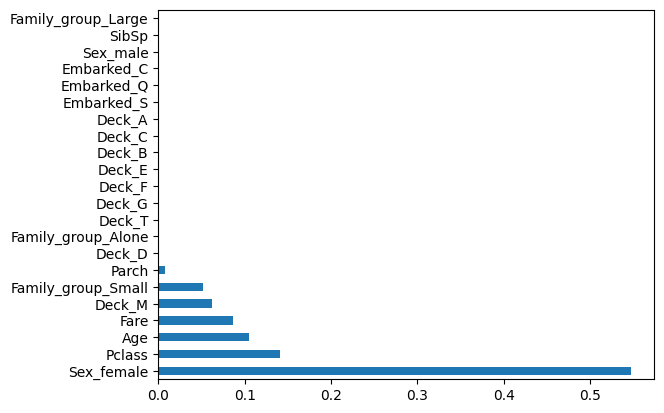

In [278]:
# tree_model2 특성 중요도 확인해보기
fi = tree_model12.feature_importances_
fi

fi_s = pd.Series(fi,index=X_train.columns)
fi_s.sort_values(ascending=False)
fi_s.sort_values(ascending=False).plot.barh()
plt.show()